## Telecom Churn Case Study 
##### Goals : Predict churning customers for a Telecom company based on temporal behaviour

### STEPS 
Data Understanding, Preparation, and Pre-Processing 

Exploratory Data Analysis

Feature Engineering and Variable Transformation 

Model Selection, Model Building, and  Prediction 


### Step 1
Data Understanding, Preparation, and Pre-Processing

In [1]:
import warnings 
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,recall_score,roc_auc_score,accuracy_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
import scipy 
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import statsmodels.api as sm
import imblearn
from imblearn.over_sampling import SMOTE

#setting max view display options
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', -1)

In [2]:
df_telecom = pd.read_csv("C:\\TelecomChurnAssignment\\train.csv",na_values='NAN')

In [3]:
df_telecom.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
df_telecom.shape

(69999, 172)

#### The train dataframe has 69999 rows and 172 columns

In [5]:
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
def metadata_matrix(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(df_telecom)


,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


In [7]:
#  Lot of COlumns are having Uniquie value as 1 this not add value to our analaysis , let drop these columns 

In [8]:
unique_val_col = []
for col in df_telecom.columns:
    if df_telecom[col].value_counts().shape[0] ==1:
        unique_val_col.append(col)
    
print(unique_val_col)
        
  

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [9]:
df_telecom.drop(unique_val_col, axis=1 , inplace=True)

In [10]:
df_telecom.shape

(69999, 159)

### Imputing Data with High Null Values 

We see lot of column with same % of missing values respectivley for Months of June , July and August. Let analyse and impute them accordingly 

In [11]:

cols_june = ['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6',
       'max_rech_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'av_rech_amt_data_6',
       'fb_user_6', 'count_rech_3g_6', 'arpu_2g_6']

In [12]:
df_telecom[cols_june].head()

,arpu_3g_6,night_pck_user_6,total_rech_data_6,max_rech_data_6,date_of_last_rech_data_6,count_rech_2g_6,av_rech_amt_data_6,fb_user_6,count_rech_3g_6,arpu_2g_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,7.0,25.0,6/25/2014,7.0,175.0,1.0,0.0,0.0


In [13]:
#sanity check whether all the columns above have occurances of NAN at the same instances.
for i in cols_june:
    print(sum(df_telecom['total_rech_data_6'].isnull()!=df_telecom[i].isnull()))


0
0
0
0
0
0
0
0
0
0


In [14]:
df_telecom[cols_june] = df_telecom[cols_june].apply(lambda x: x.fillna(0))

In [15]:
metadata_matrix(df_telecom)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_7,float64,17865,52134,74.48,837
date_of_last_rech_data_7,object,17865,52134,74.48,31
total_rech_data_7,float64,17865,52134,74.48,41
max_rech_data_7,float64,17865,52134,74.48,45
arpu_2g_7,float64,17865,52134,74.48,5056
count_rech_2g_7,float64,17865,52134,74.48,33
count_rech_3g_7,float64,17865,52134,74.48,27
fb_user_7,float64,17865,52134,74.48,2
night_pck_user_7,float64,17865,52134,74.48,2
arpu_3g_7,float64,17865,52134,74.48,5389


In [16]:
# checking for the July colum with higher NAN values  whether all the columns above have occurrences of NAN at the same instances.
cols_july = ['av_rech_amt_data_7', 'date_of_last_rech_data_7', 'total_rech_data_7',
       'max_rech_data_7', 'arpu_2g_7', 'count_rech_2g_7', 'count_rech_3g_7',
       'fb_user_7', 'night_pck_user_7', 'arpu_3g_7']

In [17]:
for i in cols_july:
    print(sum(df_telecom['total_rech_data_7'].isnull()!=df_telecom[i].isnull()))


0
0
0
0
0
0
0
0
0
0


In [18]:
df_telecom[cols_july] = df_telecom[cols_july].apply(lambda x: x.fillna(0))

In [19]:
metadata_matrix(df_telecom)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
av_rech_amt_data_8,float64,18417,51582,73.69,855
arpu_3g_8,float64,18417,51582,73.69,5816
night_pck_user_8,float64,18417,51582,73.69,2
date_of_last_rech_data_8,object,18417,51582,73.69,31
arpu_2g_8,float64,18417,51582,73.69,5132
total_rech_data_8,float64,18417,51582,73.69,44
fb_user_8,float64,18417,51582,73.69,2
count_rech_2g_8,float64,18417,51582,73.69,33
max_rech_data_8,float64,18417,51582,73.69,49
count_rech_3g_8,float64,18417,51582,73.69,29


In [20]:
# checking for the Aug colum with higher NAN values  whether all the columns above have occurrences of NAN at the same instances.
cols_aug = ['av_rech_amt_data_8', 'arpu_3g_8', 'date_of_last_rech_data_8',
       'arpu_2g_8', 'total_rech_data_8', 'fb_user_8', 'count_rech_2g_8',
       'max_rech_data_8', 'count_rech_3g_8', 'night_pck_user_8']

In [21]:
for i in cols_aug:
    print(sum(df_telecom['date_of_last_rech_data_8'].isnull()!=df_telecom[i].isnull()))


0
0
0
0
0
0
0
0
0
0


In [22]:
df_telecom[cols_aug] = df_telecom[cols_aug].apply(lambda x: x.fillna(0))

In [23]:
metadata_matrix(df_telecom)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
spl_ic_mou_8,float64,66296,3703,5.29,95
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
loc_og_mou_8,float64,66296,3703,5.29,21950
std_og_mou_8,float64,66296,3703,5.29,21745
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
std_ic_mou_8,float64,66296,3703,5.29,9939
std_ic_t2m_mou_8,float64,66296,3703,5.29,7906


In [24]:
# Columns where the date of Last recharge is null means that users are not using the services for those particular month Let impute them with 0 

last_rec_date = ['date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6']

df_telecom[last_rec_date] = df_telecom[last_rec_date].apply(lambda x: x.fillna(0))


In [25]:
metadata_matrix(df_telecom)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
spl_ic_mou_8,float64,66296,3703,5.29,95
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
loc_og_mou_8,float64,66296,3703,5.29,21950
std_og_mou_8,float64,66296,3703,5.29,21745
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
std_ic_mou_8,float64,66296,3703,5.29,9939
std_ic_t2m_mou_8,float64,66296,3703,5.29,7906


In [26]:
# We still see some 0 values in the columns where recharge was not done in 6,7,8 months ,instead of dropping these these impute them with 0
#so we are imputing those values as 0 instead of iteratively imputing.
df_telecom = df_telecom.fillna(0)


In [27]:
metadata_matrix(df_telecom)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,69999,0,0.0,69999
total_rech_data_6,float64,69999,0,0.0,37
date_of_last_rech_8,object,69999,0,0.0,32
last_day_rch_amt_6,int64,69999,0,0.0,179
last_day_rch_amt_7,int64,69999,0,0.0,166
last_day_rch_amt_8,int64,69999,0,0.0,191
date_of_last_rech_data_6,object,69999,0,0.0,31
date_of_last_rech_data_7,object,69999,0,0.0,32
date_of_last_rech_data_8,object,69999,0,0.0,32
total_rech_data_7,float64,69999,0,0.0,42


In [28]:
date_var=[col for col in df_telecom.columns if df_telecom[col].dtypes=='O']
date_var

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [29]:
# dropping the date col as they do not add values in the modelling 

df_telecom.drop(date_var, axis = 1, inplace = True)


In [30]:
#Dropping the ID column 
df_telecom.drop(['id'], axis =1 , inplace = True)

In [31]:
df_telecom.shape

(69999, 152)

In [32]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']



df_telecom.drop(individual_cols, axis = 1, inplace = True)

In [33]:
df_telecom.shape

(69999, 101)

There are certain customers who have not recharged (voice and/or data) and hence not used the corresponding services for that particular months.
There are some customers who have recharged (voice and/or data), but stopped using services. Those may be the cohort of customers who may have relatively high churn rates. We would explore this further in EDA.

Filtering the high-value customers

In [34]:
df_telecom.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,138.203540,135.347249,133.045174,163.182149,169.629833,165.854932,0.812319,0.779964,0.797125,3.802082,4.785743,4.778142,0.444289,0.023487,0.031310,306.451436,310.572674,304.513065,160.641286,160.536704,158.295100,31.080982,32.464858,31.327231,199.710640,201.878029,198.486034,0.059483,0.032090,0.038255,7.101776,7.857501,7.906786,0.820291,0.980539,0.912259,7.566522,7.706667,7.224932,328.139788,322.376363,323.846355,104.569265,104.137573,107.540351,0.619309,0.683981,0.697867,31.748339,32.260075,32.986614,0.468150,0.524807,0.530422,0.151159,0.159174,0.167445,51.773924,51.240204,50.127506,122.171882,128.934444,135.486541,0.006343,0.006143,0.005529,0.079287,0.083401,0.080930,0.388863,0.441406,0.449492,0.075815,0.077730,0.081958,0.075344,0.081444,0.085487,0.229975,0.232132,0.234246,1220.639709,68.108597,65.935830,60.07674,0.101887
std,334.213918,344.366927,351.924315,295.115497,306.326345,304.990552,312.900706,318.492632,318.453812,56.260778,54.892940,51.999899,72.055036,57.409013,62.923987,248.587898,243.048363,240.826272,385.640962,402.795152,401.603767,29.153852,28.654177,28.771385,15.557032,21.819961,17.270698,4.674074,1.683170,2.172704,465.502866,47

In [35]:
df_telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,7.53,16.04,2.61,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,3.26,24.76,24.71,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,3.44,39.44,25.03,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,24.64,12.98,0.00,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,94.38,31.34,30.01,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,882,0.0,0.0,0.0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,44.91,48.84,23.63,16.16,37.99,4.60,0.0,0.0,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53.84,86.21,49.89,81.03,8.89,0.28,2.81,95.11,50.18,83.84,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2,4,3,160,240,130,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,982,0.0,0.0,0.0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.00,58.91,25.94,15.76,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.00,0.0,0.0,63.26,42.94,15.76,21.54,9.36,28.31,0.00,0.00,0.00,21.54,9.36,28.31,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,13,10,8,290,136,122,50,41,30,7.0,7.0,6.0,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.8,308.89,213.47,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [36]:
df_telecom.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [37]:
df_telecom[['arpu_6', 'arpu_7', 'arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,69999.000000,69999.000000,69999.000000
mean,283.134365,278.185912,278.858826
std,334.213918,344.366927,351.924315
min,-2258.709000,-1289.715000,-945.808000
25%,93.581000,86.714000,84.095000
50%,197.484000,191.588000,192.234000
75%,370.791000,365.369500,369.909000
max,27731.088000,35145.834000,33543.624000


In [38]:
# Total number of negative observations for month 6,7,8

print('Total observations with negative arpu values for month 6 :' , len(df_telecom[df_telecom['arpu_6']<0]))
print('Total observations with negative arpu values for month 7 :' , len(df_telecom[df_telecom['arpu_7']<0]))
print('Total observations with negative arpu values for month 8 :' , len(df_telecom[df_telecom['arpu_8']<0]))

Total observations with negative arpu values for month 6 : 292
Total observations with negative arpu values for month 7 : 341
Total observations with negative arpu values for month 8 : 352


In [39]:
# Let's delete the rows where arpu_X with negative values 

df_telecom = df_telecom[(df_telecom['arpu_6'] >= 0) & 
                  (df_telecom['arpu_7'] >= 0) & 
                  (df_telecom['arpu_8'] >= 0)]
df_telecom.shape

(69022, 101)

In [40]:
df_telecom[['arpu_6','arpu_7','arpu_8']].describe()

,arpu_6,arpu_7,arpu_8
count,69022.000000,69022.000000,69022.000000
mean,284.780941,280.670401,280.831693
std,334.223459,344.820724,352.370311
min,0.000000,0.000000,0.000000
25%,94.731750,88.424750,85.915000
50%,198.978500,193.987000,194.243000
75%,372.419250,367.927500,371.940500
max,27731.088000,35145.834000,33543.624000


### Filtering High valued customer 

In [41]:
#Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

#Deriving Average recharge amount of June and July.

df_telecom['Average_rech_amt_6n7']=(df_telecom['total_rech_amt_6']+df_telecom['total_rech_amt_7'])/2



In [42]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
# creating the new dataset for further processing
df_churn=df_telecom[(df_telecom['Average_rech_amt_6n7']>= df_telecom['Average_rech_amt_6n7'].quantile(0.7))]

In [43]:
df_churn.shape

(20707, 102)

In [44]:
# Since we have already make use of Average_rech_amt_6n7, we can drop it.

df_churn.drop(['Average_rech_amt_6n7'], axis=1, inplace=True)

In [45]:
df_churn.shape

(20707, 101)

In [46]:
df_churn.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,44.01,21.79,55.23,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,26.93,26.21,24.53,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,322,0.0,0.0,0.0,0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,327.46,366.79,385.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,233.18,776.36,629.94,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.0,354.35,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,1.0,0.0,1.0,602,0.0,0.0,0.0,0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,950.91,822.78,387.79,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,391.38,448.21,202.89,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,455,0.0,0.0,0.0,0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,252.48,257.74,129.73,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,223.11,146.09,171.01,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,7,7,10,440,427,240,110,110,30,1.0,2.0,1.0,23.0,23.0,23.0,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,2,1,0,0,0,0,0,0,0.0,0.0,0.0,1219,0.0,0.0,0.0,0
25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,0.0,0.0,0.0,0.0,0.0,0.0,217.53,190.49,311.91,399.39,114.51,416.99,0.0,0.0,0.0,0.00,4.40,25.24,0.0,0.0,0.0,616.93,309.41,754.16,370.73,297.11,425.58,26.64,19.68,10.04,401.39,319.08,454.91,0.00,0.0,0.0,4.01,2.28,19.28,0.0,0.00,0.0,8,5,11,330,480,730,110,150,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2831,0.0,0.0,0.0,0


In [47]:
metadata_matrix(df_churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,20707,0,0.0,20314
max_rech_data_7,float64,20707,0,0.0,43
vol_2g_mb_8,float64,20707,0,0.0,5330
vol_2g_mb_7,float64,20707,0,0.0,5697
vol_2g_mb_6,float64,20707,0,0.0,5688
count_rech_3g_8,float64,20707,0,0.0,29
count_rech_3g_7,float64,20707,0,0.0,27
count_rech_3g_6,float64,20707,0,0.0,23
count_rech_2g_8,float64,20707,0,0.0,31
count_rech_2g_7,float64,20707,0,0.0,32


## Exploratory Data Analysis, Feature Engineering & Data Visualization

In [48]:
df_churn.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20707 entries, 12 to 69996
Data columns (total 101 columns):
 #    Column             Dtype  
---   ------             -----  
 0    arpu_6             float64
 1    arpu_7             float64
 2    arpu_8             float64
 3    onnet_mou_6        float64
 4    onnet_mou_7        float64
 5    onnet_mou_8        float64
 6    offnet_mou_6       float64
 7    offnet_mou_7       float64
 8    offnet_mou_8       float64
 9    roam_ic_mou_6      float64
 10   roam_ic_mou_7      float64
 11   roam_ic_mou_8      float64
 12   roam_og_mou_6      float64
 13   roam_og_mou_7      float64
 14   roam_og_mou_8      float64
 15   loc_og_mou_6       float64
 16   loc_og_mou_7       float64
 17   loc_og_mou_8       float64
 18   std_og_mou_6       float64
 19   std_og_mou_7       float64
 20   std_og_mou_8       float64
 21   isd_og_mou_6       float64
 22   isd_og_mou_7       float64
 23   isd_og_mou_8       float64
 24   spl_og_mou_6       float6

####  Analyse the Catagorical and Continous columns 


In [49]:
columns_to_convert = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

# Convert the specified columns from float to categorical
for col in columns_to_convert:
    df_churn[col] = df_churn[col].astype(int)

In [50]:
# Creating a list for categorical and numerical features

cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','monthly_2g_6', 'monthly_2g_7','monthly_2g_8',
            'sachet_2g_6','sachet_2g_7','sachet_2g_8',
            'sachet_3g_6','sachet_3g_7','sachet_3g_8',
            'monthly_3g_6','monthly_3g_7','monthly_3g_8'] 

In [51]:
num_col = [num_val for num_val in df_churn.columns if df_churn[num_val].dtypes != 'O' and num_val not in cat_cols]

num_col.remove('churn_probability')
df_churn[num_col].head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6
12,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,644.43,0.0,0.0,0.0,0.0,0.0,0.0,44.01,21.79,55.23,772.43,814.43,632.18,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,816.44,836.23,687.41,26.93,26.21,24.53,7.56,9.13,2.46,34.49,35.34,26.99,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,15,10,20,521,418,365,110,110,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,322,0.0,0.0,0.0
15,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.0,0.0,0.0,0.0,0.0,0.0,327.46,366.79,385.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,233.18,776.36,629.94,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,654,400,652,250,250,250,1.0,0.0,1.0,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.0,354.35,0.0,0.0,0.0,602,0.0,0.0,0.0
23,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.0,0.0,0.0,0.0,0.0,0.0,950.91,822.78,387.79,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,391.38,448.21,202.89,207.03,0.00,0.00,598.54,448.36,203.29,0.13,0.0,0.0,0.00,0.00,0.00,0.0,0.15,0.4,26,19,10,1420,990,494,110,110,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,455,0.0,0.0,0.0
24,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,222.03,0.0,0.0,0.0,0.0,0.0,0.0,252.48,257.74,129.73,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,624.38,546.06,251.89,223.11,146.09,171.01,6.96,9.54,21.93,230.08,155.64,192.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,7,7,10,440,427,240,110,110,30,1.0,2.0,1.0,23.0,23.0,23.0,1.0,2.0,1.0,0.0,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.0,1219,0.0,0.0,0.0
25,362.951,321.763,689.603,193.71,124.53,197.54,423.21,184.88,556.61,0.0,0.0,0.0,0.0,0.0,0.0,217.53,190.49,311.91,399.39,114.51,416.99,0.0,0.0,0.0,0.00,4.40,25.24,0.0,0.0,0.0,616.93,309.41,754.16,370.73,297.11,425.58,26.64,19.68,10.04,401.39,319.08,454.91,0.00,0.0,0.0,4.01,2.28,19.28,0.0,0.00,0.0,8,5,11,330,480,730,110,150,130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2831,0.0,0.0,0.0


## EDA

### Churn Distribution

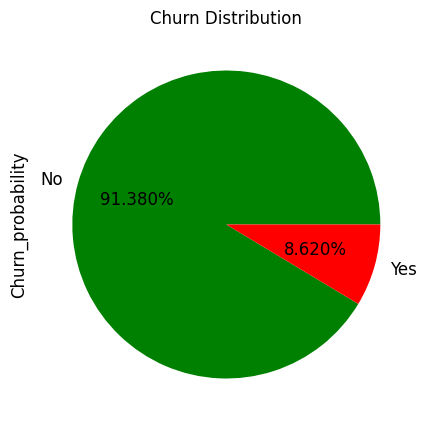

In [52]:
# Understanding the churn distribution
ax = (df_churn['churn_probability'].value_counts()*100.0 /len(df_churn)).plot.pie(autopct='%.3f%%', 
                                                                                        labels = ['No', 'Yes'],
                                                                                        colors =['g','r'],
                                                                                        figsize =(5,5), 
                                                                                        fontsize = 12 )                                                                           

ax.set_ylabel('Churn_probability',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

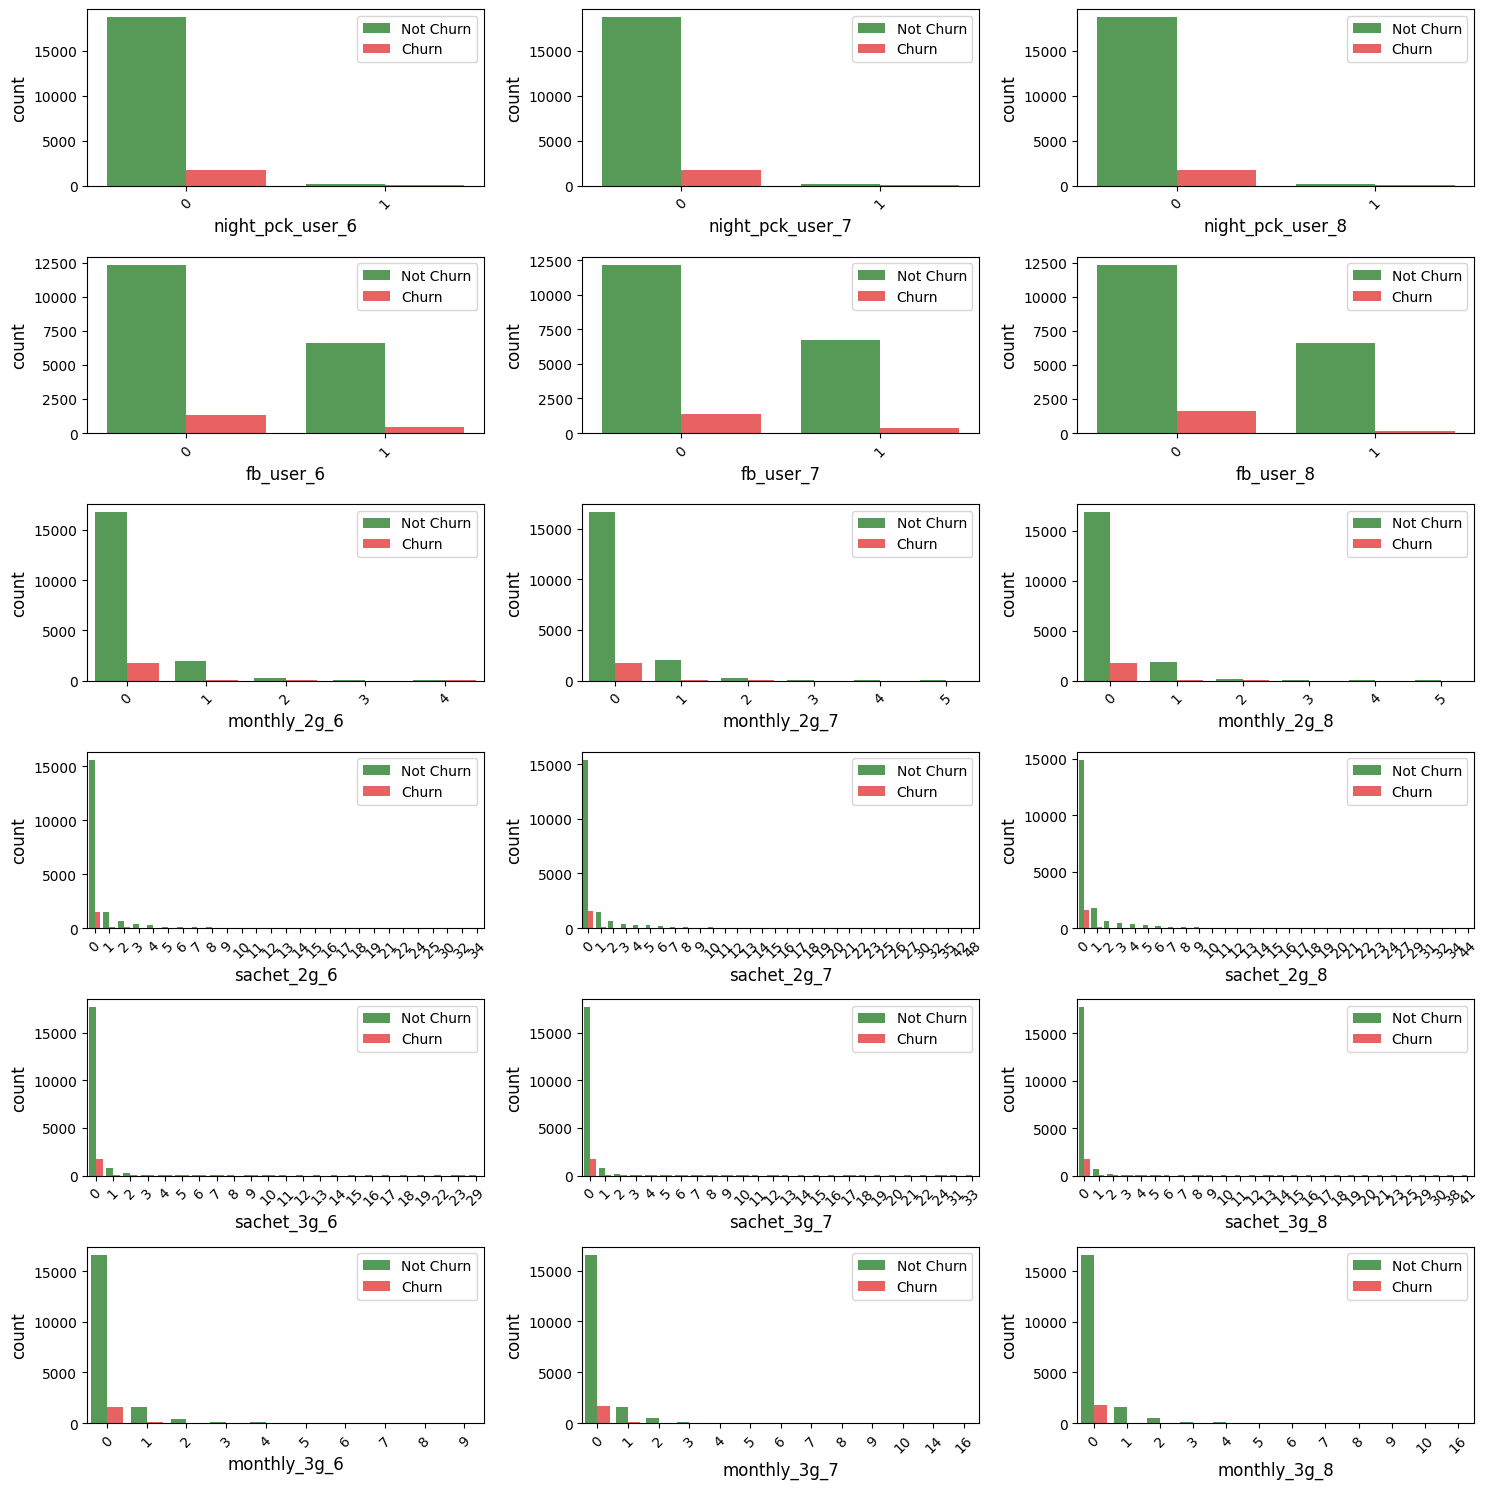

In [53]:
# Plotting a countplot with all categorical variables 
fig, axes = plt.subplots(round(len(cat_cols) / 3), 3, figsize=(15, 15))

total = float(len(df_churn))
for i, ax in enumerate(fig.axes):
    if i < len(cat_cols):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=cat_cols[i], alpha=0.7, data=df_churn, hue=df_churn['churn_probability'],palette=['g','r'], ax=ax)
        # Renaming the Legends from 0/1 to Not Churn/Churn
        ax.legend(['Not Churn','Churn'],loc="upper right")
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(cat_cols[i],fontsize=12)
        ax.set_ylabel('count',fontsize=12)
        
fig.tight_layout()

The churner are low for the categorical columns 
Chruner are low for night package users and customers using social media

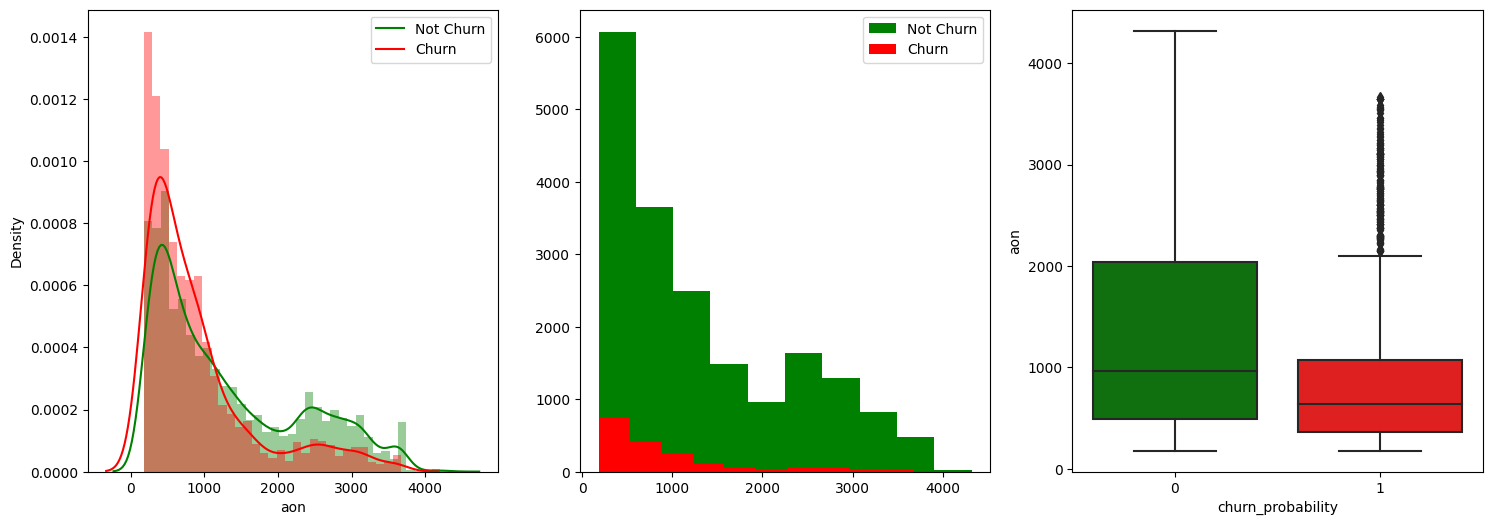

In [54]:
# Data Distribution on the Age of Network feature (AON)
plt.figure(figsize = (18,6))
plt.subplot(1,3,1)
sns.distplot(df_churn.loc[df_churn['churn_probability']==0,'aon'],hist=True, color = 'g')
sns.distplot(df_churn.loc[df_churn['churn_probability']==1,'aon'],hist=True, color='r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,2)
plt.hist(df_churn.loc[df_churn['churn_probability']==0,'aon'],color = 'g')
plt.hist(df_churn.loc[df_churn['churn_probability']==1,'aon'],color = 'r')
plt.legend(['Not Churn','Churn'])

plt.subplot(1,3,3)
sns.boxplot(y='aon', data = df_churn, x='churn_probability',palette =['g','r'])

plt.show()

The customers with lesser 'aon' are more likely to Churn when compared to the Customers with higer 'aon'

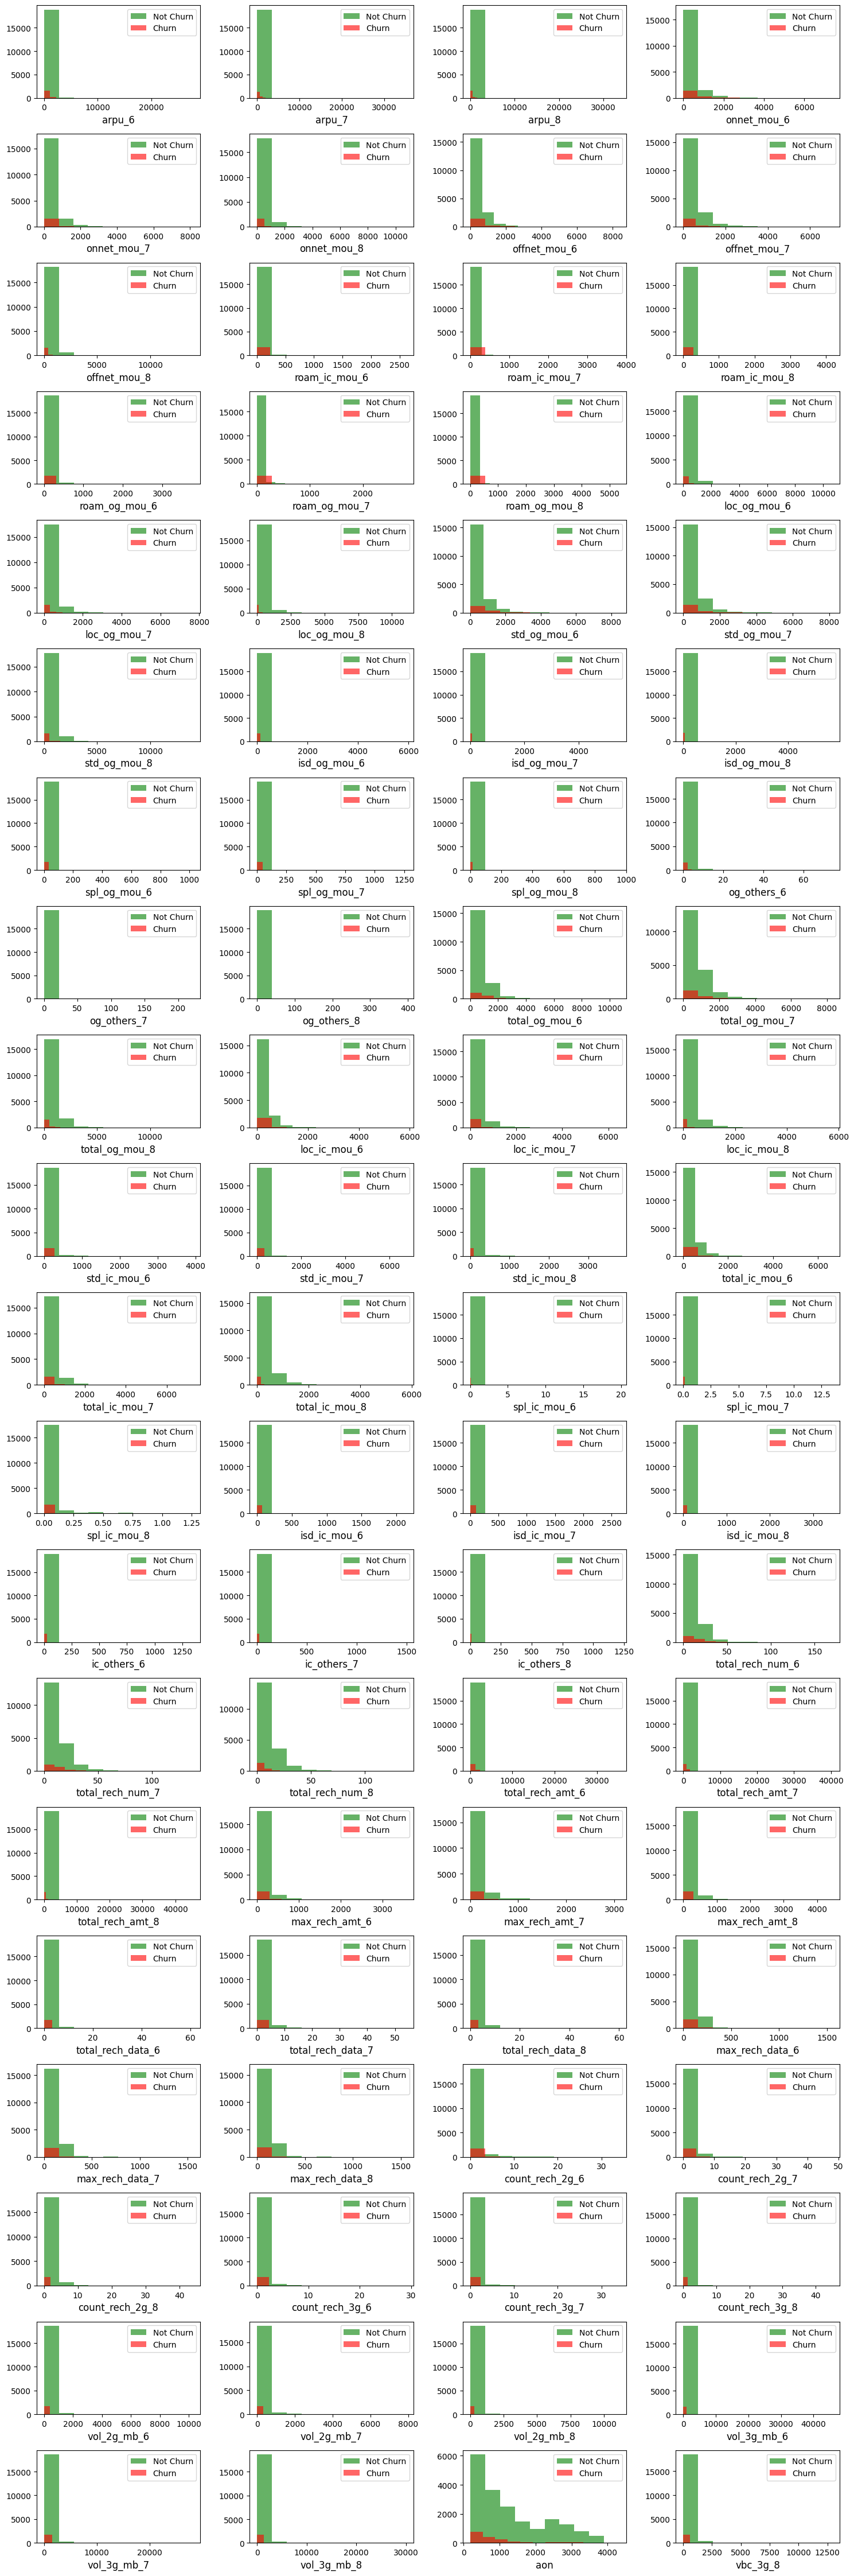

In [55]:


# Plotting histograms for numerical features
fig, axes = plt.subplots(round(len(num_col) / 4), 4, figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        ax.hist(df_churn.loc[df_churn['churn_probability'] == 0, num_col[i]], color='g', alpha=0.6, label='Not Churn')
        ax.hist(df_churn.loc[df_churn['churn_probability'] == 1, num_col[i]], color='r', alpha=0.6, label='Churn')
        # adjusting font size of X-Labels and Y-Labels
        ax.set_xlabel(num_col[i], fontsize=12)
        ax.legend(loc='best')
        
plt.tight_layout()
plt.show()


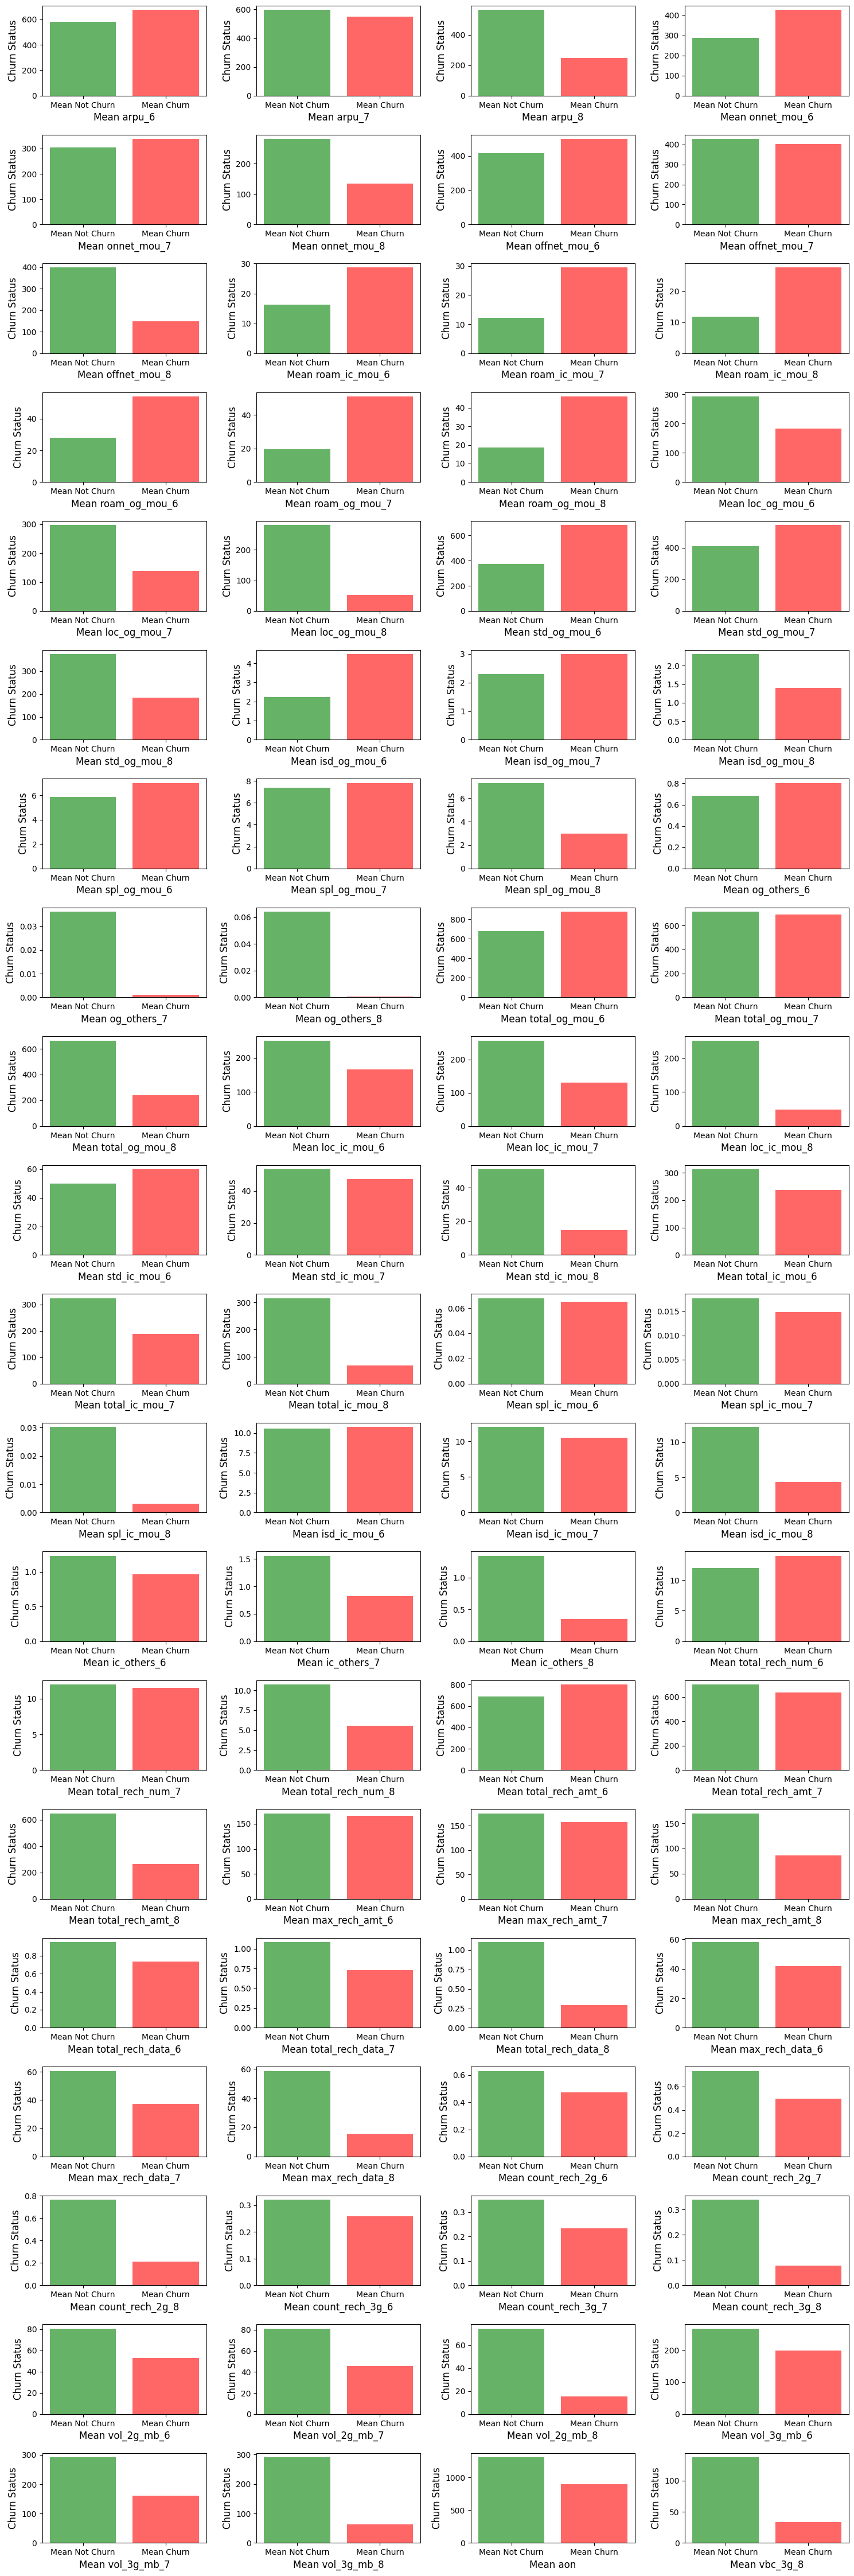

In [56]:


import matplotlib.pyplot as plt

# Plotting bar plots for numerical features
fig, axes = plt.subplots(round(len(num_col) / 4), 4, figsize=(15, 45))

for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        # Calculate the mean for each numerical column for both 'Not Churn' and 'Churn' classes
        mean_not_churn = df_churn.loc[df_churn['churn_probability'] == 0, num_col[i]].mean()
        mean_churn = df_churn.loc[df_churn['churn_probability'] == 1, num_col[i]].mean()

        # Plot the bar plots only if data exists for the column
        if not pd.isnull(mean_not_churn) and not pd.isnull(mean_churn):
            ax.bar(['Mean Not Churn', 'Mean Churn'], [mean_not_churn, mean_churn], color=['g', 'r'], alpha=0.6)

            # Set labels for X-axis and Y-axis
            ax.set_xlabel('Mean ' + num_col[i], fontsize=12)
            ax.set_ylabel('Churn Status', fontsize=12)

plt.tight_layout()
plt.show()




Identify outlier 

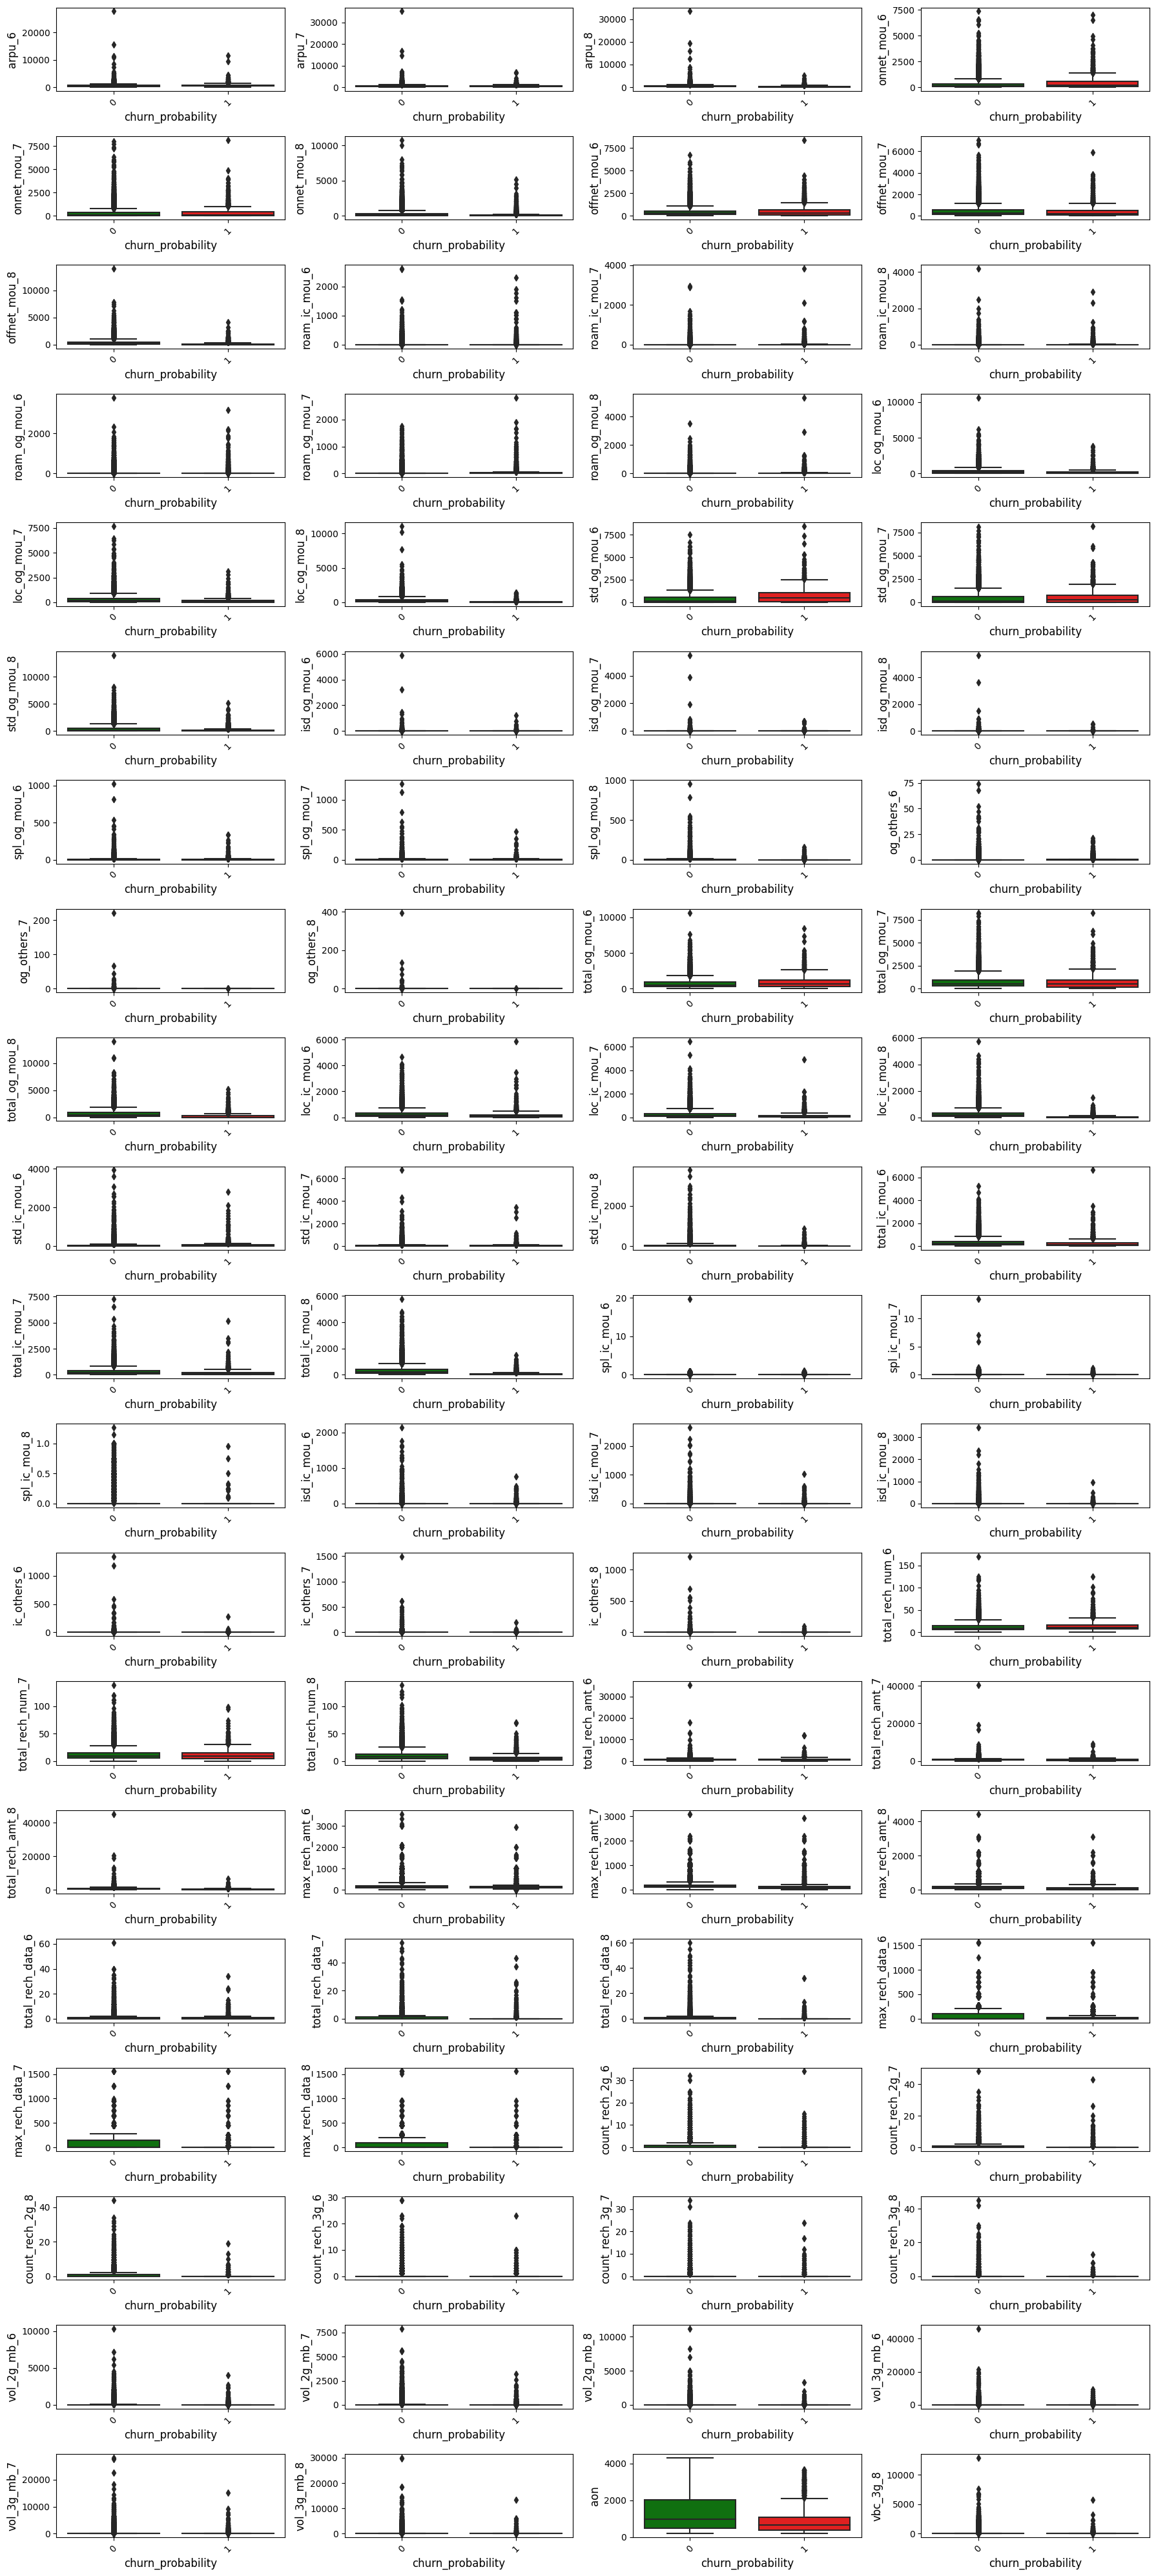

In [60]:
fig, axes = plt.subplots(round(len(num_col) / 4), 4, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_col[i], data=df_churn, x='churn_probability', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_col[i],fontsize=12)
        ax.set_xlabel('churn_probability',fontsize=12)

fig.tight_layout()

####  Understanding the Correlation between variables

In [61]:
# Checking for features that highly correlated

corr_matrix =df_churn.corr().abs()


upper_triangle = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)))

highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.80)]
print("List of highly correlated features - \n\n", highly_correlated_features)
print("\n\nTotal features with high correlation - ", len(highly_correlated_features))

List of highly correlated features - 

 ['loc_og_mou_8', 'isd_og_mou_7', 'isd_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']


Total features with high correlation -  22


In [62]:
skew_features = df_churn[num_col].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.2 ".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 82 numerical features with Skew > 0.2 


og_others_7          112.261374
og_others_8          105.995707
isd_og_mou_8         80.161146 
isd_og_mou_6         79.324899 
isd_og_mou_7         77.885446 
ic_others_6          56.744514 
spl_ic_mou_7         51.310974 
ic_others_7          48.411094 
ic_others_8          47.474503 
spl_ic_mou_6         43.983194 
arpu_7               23.337752 
total_rech_amt_8     22.387088 
total_rech_amt_7     20.895716 
roam_ic_mou_8        20.023691 
spl_og_mou_7         19.790624 
arpu_8               19.178100 
roam_ic_mou_7        17.786549 
spl_og_mou_6         17.657123 
isd_ic_mou_8         17.425104 
total_rech_amt_6     16.901782 
arpu_6               15.968037 
roam_og_mou_8        15.712382 
isd_ic_mou_7         15.254211 
spl_og_mou_8         14.642135 
isd_ic_mou_6         14.302400 
std_ic_mou_7         13.453966 
vol_3g_mb_6          13.219173 
roam_ic_mou_6        12.112287 
count_rech_3g_8      12.091289 
vol_2g_mb_8          10.915771 
std_ic_mou_8         10.257394 
std_ic_m

In [63]:
# Handling outliers in numerical features using Boxcox

for i in skew_index:
    df_churn[i] = boxcox1p(df_churn[i], boxcox_normmax(df_churn[i] + 1, method = 'mle'))

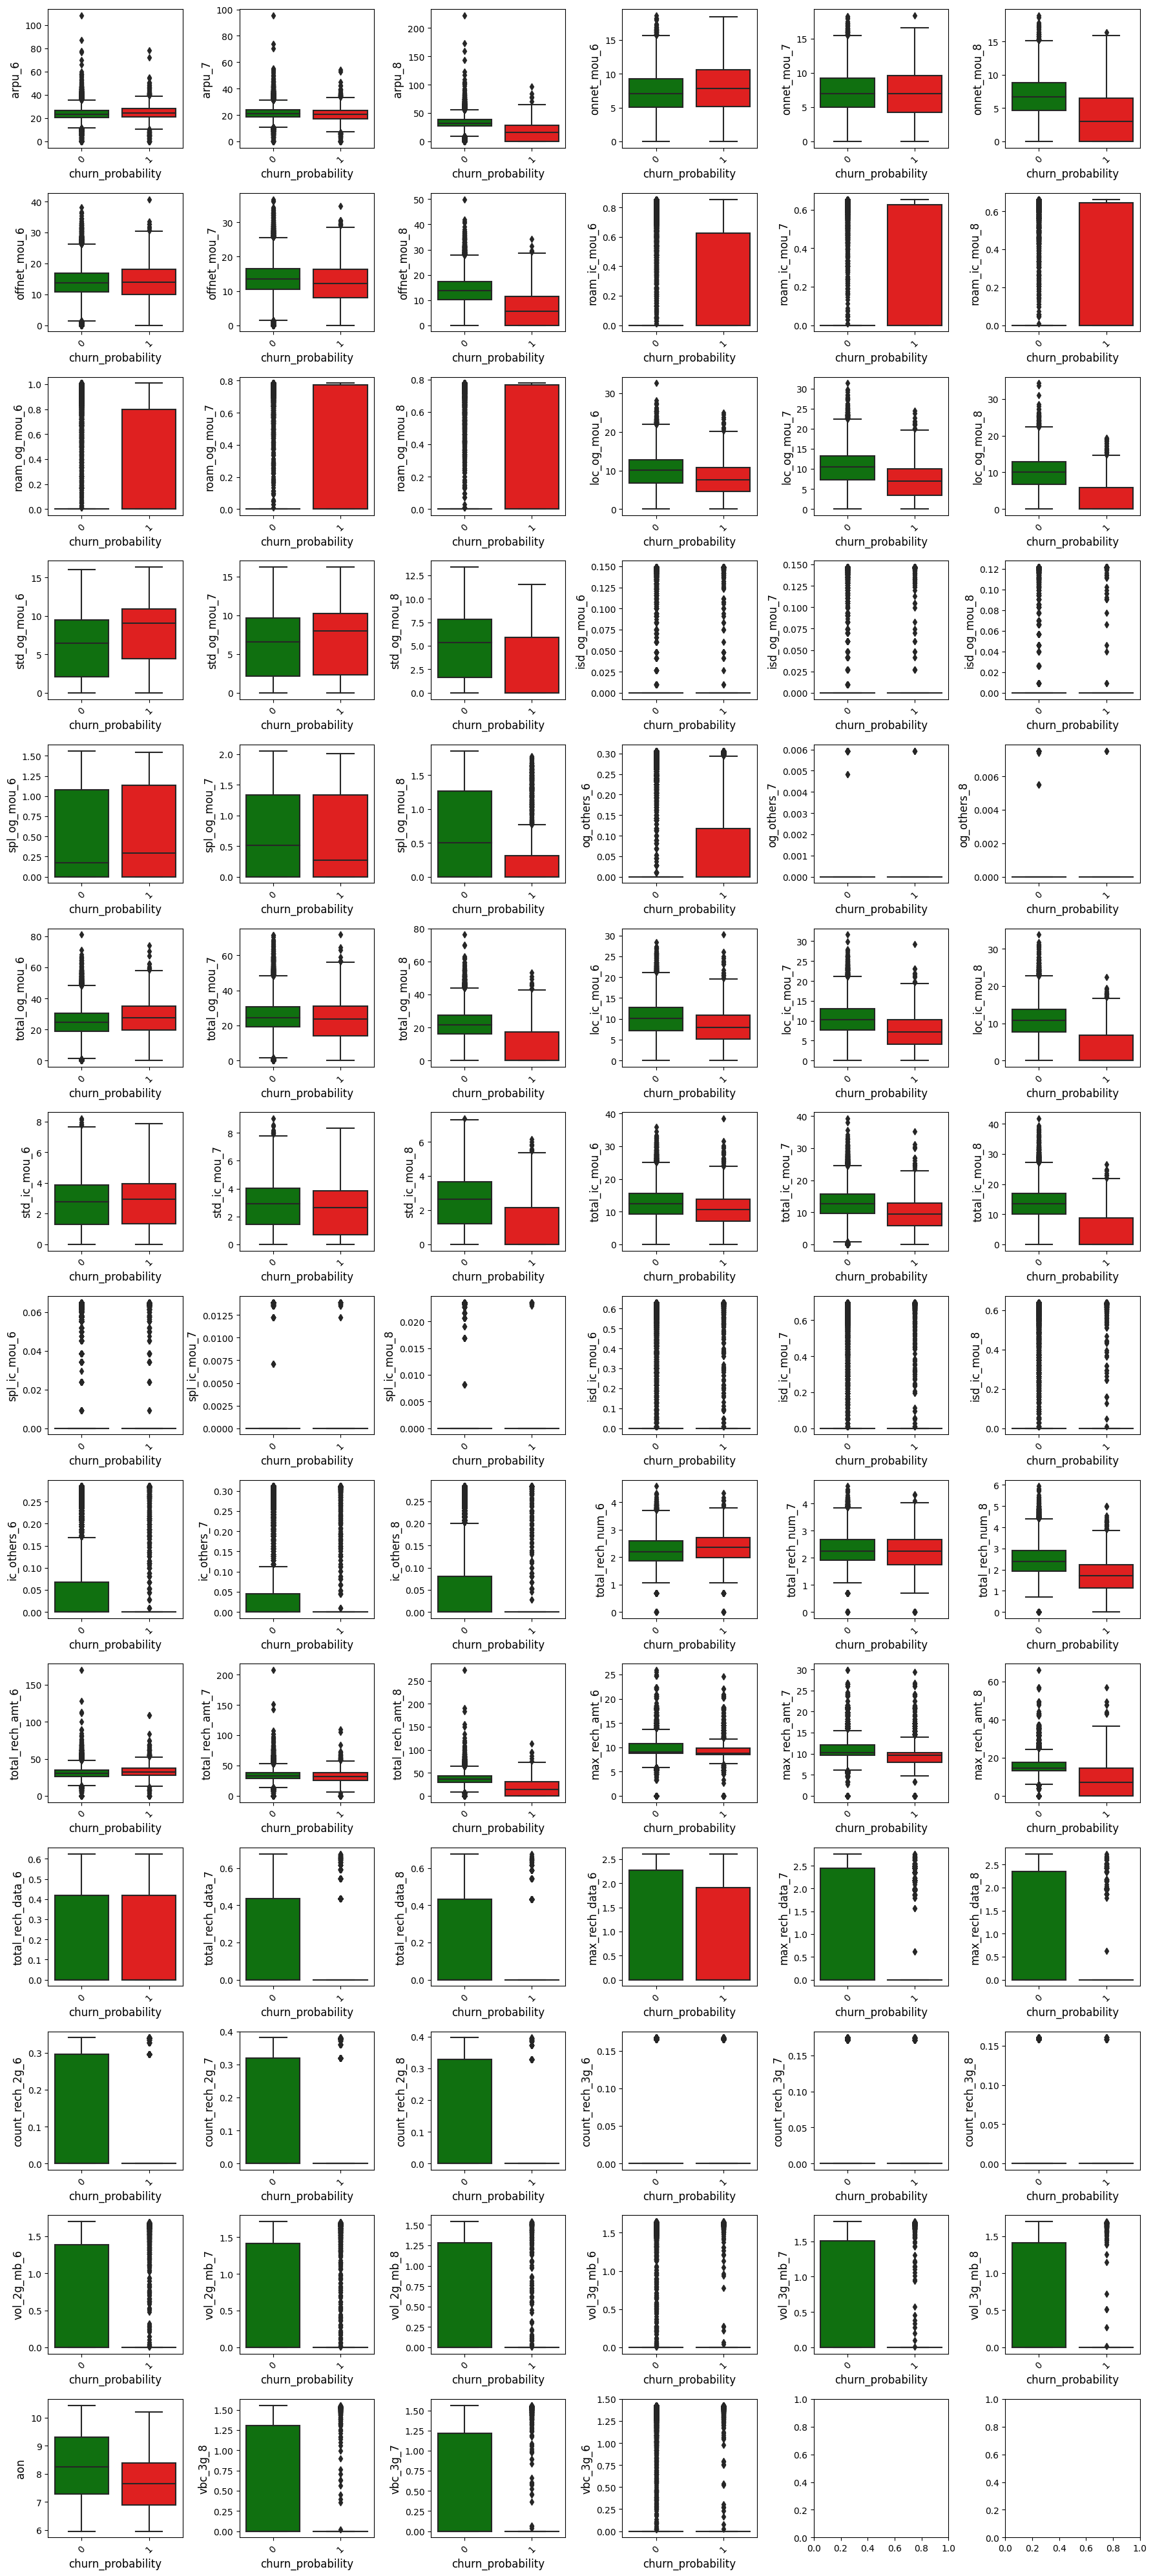

In [64]:
# Rechecking for outliers after treatment
fig, axes = plt.subplots(round(len(num_col) / 6), 6, figsize=(18, 40))

for i, ax in enumerate(fig.axes):
    if i < len(num_col):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.boxplot(y=num_col[i], data=df_churn, x='churn_probability', ax=ax,palette = ['g','r'])
        ax.set_ylabel(num_col[i],fontsize=12)
        ax.set_xlabel('churn_probability',fontsize=12)

fig.tight_layout()

In [65]:
df_churn.isnull().sum()

arpu_6               0
arpu_7               0
arpu_8               0
onnet_mou_6          0
onnet_mou_7          0
onnet_mou_8          0
offnet_mou_6         0
offnet_mou_7         0
offnet_mou_8         0
roam_ic_mou_6        0
roam_ic_mou_7        0
roam_ic_mou_8        0
roam_og_mou_6        0
roam_og_mou_7        0
roam_og_mou_8        0
loc_og_mou_6         0
loc_og_mou_7         0
loc_og_mou_8         0
std_og_mou_6         0
std_og_mou_7         0
std_og_mou_8         0
isd_og_mou_6         0
isd_og_mou_7         0
isd_og_mou_8         0
spl_og_mou_6         0
spl_og_mou_7         0
spl_og_mou_8         0
og_others_6          0
og_others_7          0
og_others_8          0
total_og_mou_6       0
total_og_mou_7       0
total_og_mou_8       0
loc_ic_mou_6         0
loc_ic_mou_7         0
loc_ic_mou_8         0
std_ic_mou_6         0
std_ic_mou_7         0
std_ic_mou_8         0
total_ic_mou_6       0
total_ic_mou_7       0
total_ic_mou_8       0
spl_ic_mou_6         0
spl_ic_mou_

In [66]:
# Create correlation matrix



corr_matrix = df_churn.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop

df_churn = df_churn.drop(to_drop,1)
df_churn.shape

(20707, 76)

## Feature Engineering

In [65]:
df_churn.shape

(20707, 76)

In [67]:
# Drop rows with missing values

for col in df_churn.columns:
    df_churn = df_churn[~df_churn[col].isna()]

In [68]:
metadata_matrix(df_churn)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,20707,0,0.0,20314
total_rech_data_7,float64,20707,0,0.0,41
vol_3g_mb_6,float64,20707,0,0.0,4862
count_rech_3g_8,float64,20707,0,0.0,29
count_rech_3g_7,float64,20707,0,0.0,27
count_rech_3g_6,float64,20707,0,0.0,23
count_rech_2g_7,float64,20707,0,0.0,32
count_rech_2g_6,float64,20707,0,0.0,28
total_rech_data_8,float64,20707,0,0.0,43
total_rech_data_6,float64,20707,0,0.0,35


#### Applying the test train split 

In [69]:
# Using Train-Test split to split the training data in a ratio of 70:30

#Target variable
X = df_churn.drop('churn_probability', axis = 1)
y = df_churn[['churn_probability']]

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

# Observing the shape of train and test data 
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (14494, 75)
 Shape of y_train is :  (14494, 1)
 Shape of X_test is  :  (6213, 75)
 Shape of y_test is  :  (6213, 1)


In [70]:
lr = LogisticRegression()


In [71]:
lr.fit(X_train,y_train)
#print the classification report
print(classification_report(y_test, lr.predict(X_test)))
print("ROC score:", roc_auc_score(y_test, lr.predict(X_test)))
print("Accuracy Score", accuracy_score(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5677
           1       0.65      0.42      0.51       536

    accuracy                           0.93      6213
   macro avg       0.80      0.70      0.74      6213
weighted avg       0.92      0.93      0.92      6213

ROC score: 0.6982981867130789
Accuracy Score 0.9303074199259617


In [72]:
## Class Imbalance 

y.value_counts(normalize=True).to_frame()

,0
churn_probability,
0,0.913797
1,0.086203


In [73]:
# Ratio of classes 
class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : churn_probability    0.094
dtype: float64


##### The Datset is highly imbalanced , so we we need to balance it 

#To account for class imbalance, Synthetic Minority Class Oversampling Technique (SMOTE) could be used.

In [74]:
smt = SMOTE(random_state=42)

# Resampling Train set to account for class imbalance

X_sm, y_sm= smt.fit_resample(X, y)
X_sm.head()


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8
0,22.142483,19.095570,29.303283,8.528431,6.697025,4.972429,17.433583,18.224895,18.703731,0.0,0.0,0.0,6.106930,4.649463,10.200776,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,29.654089,29.422244,24.921851,5.151639,5.124540,2.142637,2.329802,1.220181,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,2.606427,2.327421,3.410814,8.815936,9.699876,9.361870,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.720967,0.0
1,24.757851,18.707382,27.322203,2.937451,4.152247,7.768821,14.259045,14.187604,12.348301,0.0,0.0,0.0,12.196802,12.990166,0.000000,0.0,0.0,0.0,0.075119,0.000000,0.000000,0.081927,0.0,0.0,20.387884,21.053768,19.999490,11.475082,17.037653,0.000000,0.709369,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,1.721354,1.362541,1.708174,11.654167,13.076315,19.696264,0.419034,0.000000,0.434391,0.296512,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,7.573130,0.0
2,32.230419,26.051551,32.235570,11.661546,9.332146,0.665457,13.879544,15.562959,15.700128,0.0,0.0,0.0,16.808687,16.641669,7.446479,0.0,0.0,0.0,0.000000,0.048236,0.009924,0.000000,0.0,0.0,34.060512,29.232676,19.924043,13.575609,14.351608,5.310157,0.000000,0.000000,0.055154,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.11265,0.197187,3.062837,2.886276,2.621437,8.815936,9.699876,15.391239,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.188335,0.0
3,20.683489,18.213571,23.201990,6.500815,4.831468,4.388805,17.006100,16.198150,12.894010,0.0,0.0,0.0,11.235390,11.605272,8.643223,0.0,0.0,0.0,0.000000,0.000000,0.284035,0.000000,0.0,0.0,26.599333,24.779202,16.763230,11.308204,9.895645,2.070263,2.369973,3.000449,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,1.985015,2.026303,2.621437,8.815936,9.699876,7.250108,0.419034,0.544148,0.434391,0.296512,0.359729,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,8.568309,0.0
4,20.477277,17.588135,38.207797,8.011302,6.970946,7.801619,15.746981,11.465096,17.795787,0.0,0.0,0.0,10.710349,10.509073,8.789176,0.0,0.0,0.0,0.000000,1.165025,1.565836,0.000000,0.0,0.0,26.469593,19.620280,25.828788,13.342904,12.569716,3.308606,3.053672,2.323423,0.000000,0.0,0.0,0.582481,0.571789,0.63422,0.0,0.00000,0.000000,2.091982,1.752213,2.725492,8.815936,10.884649,14.691237,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.805556,0.0


In [75]:
#check the percantage value counts of churn
y_sm.value_counts(normalize=True)*100

churn_probability
0                    50.0
1                    50.0
dtype: float64

Test -Train Split 

In [76]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.3)

In [77]:
print(X_train_sm.shape)
print(X_test_sm.shape)
print(y_train_sm.shape)
print(y_test_sm.shape)

(26490, 75)
(11354, 75)
(26490, 1)
(11354, 1)


In [78]:
## Scalling the X

In [79]:
#use MinMaxScaler is scale the predictors (X)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_sm)
X_test_scaled = scaler.transform(X_test_sm)
#converting array into dataframe
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_train_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8
0,0.307496,0.301493,0.113153,0.496009,0.547821,0.023926,0.473440,0.329001,0.130463,0.000000,0.000000,0.000000,0.506492,0.502400,0.000000,0.0,0.0,0.0,0.825812,0.876911,0.792452,0.688335,0.0,0.0,0.382140,0.390708,0.104851,0.317524,0.325311,0.000000,0.000000,0.000000,0.921254,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.850026,0.844712,0.458493,0.266501,0.192015,0.141623,0.00000,0.804097,0.803538,0.0,0.944073,0.000000,0.000000,0.000000,0.000000,0.000000,0.962736,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.041667,0.045455,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.108406,0.970793
1,0.268887,0.234404,0.000000,0.243925,0.227613,0.000000,0.507840,0.418483,0.000000,0.000000,0.171765,0.000000,0.170750,0.122851,0.620692,0.0,0.0,0.0,0.117912,0.214199,0.000000,0.000000,0.0,0.0,0.350830,0.315796,0.000000,0.160130,0.134423,0.540740,0.469124,0.000000,0.000000,0.0,0.0,0.000000,0.444555,0.000000,0.000000,0.000000,0.000000,0.683168,0.625765,0.178323,0.251339,0.221985,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.122115,0.000000
2,0.350737,0.289042,0.016263,0.408990,0.200011,0.071350,0.733781,0.602660,0.000000,0.000000,0.818463,0.738191,0.211970,0.237056,0.798344,0.0,0.0,0.0,0.000000,0.366009,0.000000,0.000000,0.0,0.0,0.557570,0.488714,0.000000,0.287865,0.238503,0.544410,0.394314,0.000000,0.000000,0.0,0.0,0.339845,0.000000,0.000000,0.000000,0.000000,0.000000,0.619869,0.409145,0.245463,0.356643,0.324638,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.382164,0.000000
3,0.232071,0.314749,0.189309,0.570058,0.629073,0.561794,0.322182,0.510405,0.349024,0.000000,0.000000,0.000000,0.086299,0.116950,0.632184,0.0,0.0,0.0,0.741515,0.000000,0.000000,0.000000,0.0,0.0,0.356078,0.540086,0.405457,0.143086,0.238074,0.320867,0.309291,0.220787,0.000000,0.0,0.0,0.693301,0.998258,0.998990,0.999802,0.896645,0.949824,0.476550,0.535184,0.489780,0.356643,0.324638,0.220676,0.00000,0.000000,0.641152,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.022727,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.194729,0.000000
4,0.460241,0.422081,0.367207,0.736599,0.662897,0.775382,0.538908,0.427951,0.437066,0.999399,0.999930,0.993664,0.377030,0.239254,0.723474,0.0,0.0,0.0,0.647017,0.000000,0.025909,0.000000,0.0,0.0,0.496155,0.385783,0.626151,0.341305,0.256066,0.679659,0.472800,0.698358,0.000000,0.0,0.0,0.999836,0.993242,0.999838,0.000000,0.442574,0.759993,0.680739,0.631495,0.610677,0.421907,0.402849,0.271095,0.67064,0.872734,0.803538,0.0,0.837848,0.984025,0.998144,0.986731,0.983834,0.960147,0.989696,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.000000,0.022727,0.111111,0.0,0.0,0.0,0.060606,0.02439,0.814630,0.994684


In [80]:
X_test_scaled.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_mou_6,loc_og_mou_7,std_og_mou_6,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_mou_6,loc_ic_mou_7,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8
0,0.224017,0.251529,0.121239,0.529520,0.532405,0.416633,0.293999,0.330904,0.172912,0.000000,0.000000,0.866897,0.174869,0.161196,0.586446,0.000000,0.000000,0.0,0.656166,0.632698,0.256997,0.216471,0.0,0.0,0.317760,0.374592,0.225115,0.175340,0.151551,0.321484,0.285600,0.263953,0.000000,0.0,0.000000,0.000000,0.00000,0.441365,0.286461,0.000000,0.0,0.453457,0.423703,0.315932,0.343512,0.278679,0.179336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.228228,0.000000
1,0.267567,0.158562,0.037246,0.437532,0.100648,0.000000,0.495720,0.312310,0.051237,0.000000,0.943763,0.969332,0.347136,0.195028,0.601680,0.000000,0.000000,0.0,0.483274,0.523692,0.000000,0.892098,0.0,0.0,0.373638,0.210688,0.000000,0.358410,0.173499,0.305017,0.000000,0.000000,0.998917,0.0,0.000000,0.000000,0.00000,0.000000,0.847868,0.000000,0.0,0.476550,0.377454,0.192455,0.356643,0.335413,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.325264,0.000000
2,0.221721,0.288049,0.136628,0.274854,0.343695,0.281378,0.197794,0.181488,0.162028,0.000000,0.000000,0.000000,0.124463,0.119245,0.353105,0.000000,0.000000,0.0,0.709819,0.736317,0.000000,0.000000,0.0,0.0,0.147947,0.190186,0.160539,0.137739,0.161490,0.368504,0.390394,0.499745,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.476550,0.501363,0.351835,0.436443,0.438871,0.240022,0.670640,0.804097,0.641152,0.868819,0.837848,0.000000,0.981092,0.0,0.991604,0.989669,0.98145,0.0,0.0,0.0,0.25,0.25,0.2,0.0,0.0,0.000000,0.000000,0.1,0.0,0.0,0.0,0.0,0.092180,0.941789
3,0.347100,0.324635,0.000000,0.431583,0.304706,0.000000,0.256987,0.236565,0.000000,0.826354,0.000000,0.000000,0.269844,0.274740,0.433116,0.041446,0.957378,0.0,0.759680,0.436368,0.000000,0.931270,0.0,0.0,0.239243,0.199329,0.000000,0.468293,0.386221,0.489196,0.094244,0.000000,0.886559,0.0,0.000000,0.041395,0.04127,0.000000,0.989471,0.041010,0.0,0.452460,0.439186,0.000000,0.478216,0.442028,0.000000,0.855161,0.033327,0.000000,0.000000,0.034725,0.958309,0.040662,0.0,0.951992,0.039790,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.222222,0.0,0.0,0.0,0.0,0.0,0.654651,0.000000
4,0.282074,0.243289,0.199954,0.418511,0.426466,0.476950,0.526163,0.326216,0.418045,0.000000,0.000000,0.000000,0.313111,0.301906,0.633890,0.000000,0.000000,0.0,0.816250,0.736618,0.508870,0.987544,0.0,0.0,0.390679,0.304066,0.409936,0.398146,0.430176,0.578610,0.329529,0.370921,0.994887,0.0,0.999922,0.000000,0.00000,0.000000,0.000000,0.990539,0.0,0.645159,0.518997,0.563541,0.297876,0.268081,0.222244,0.000000,0.000000,0.908647,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.090909,0.000000,0.0,0.0,0.0,0.0,0.0,0.177086,0.000000


## Modelling 

### Model 1 : Interpretable Model : Logistic Regression

In [81]:
lrm = LogisticRegression()
lrm.fit(X_train_scaled ,y_train_sm)

#print the classification report
print(classification_report(y_test_sm, lrm.predict(X_test_scaled)))
print("ROC score:", roc_auc_score(y_test_sm, lrm.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      5717
           1       0.87      0.85      0.86      5637

    accuracy                           0.87     11354
   macro avg       0.87      0.87      0.87     11354
weighted avg       0.87      0.87      0.87     11354

ROC score: 0.8662115847996861


The ROC score has increased after rescaling and after handling the imbalance 

# PCA 

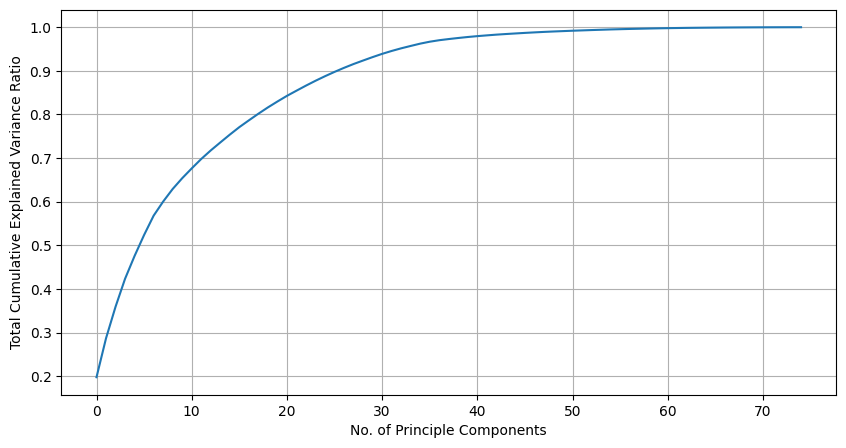

In [82]:
pca = PCA(random_state=100)
pca.fit(X_train_scaled)
var_cumu = np.cumsum(pca.explained_variance_ratio_)
#plotting different variance for chosen no. of principle components
plt.figure(figsize=(10,5))    
plt.plot(var_cumu)
plt.xlabel('No. of Principle Components')
plt.ylabel('Total Cumulative Explained Variance Ratio')
plt.grid()
plt.show()

In [83]:
#check cumulative variance explained by top 35 principle components 
var_cumu[35-1]



0.9623679438041651

In [84]:
#using top PCs for data preparation for our model
pc2 = PCA(35, random_state=100)
new_train_data = pc2.fit_transform(X_train_scaled)
new_test_data = pc2.transform(X_test_scaled)
pc_cols = []
for i in range(35):
    pc_cols.append('PC'+str(i))
X_train_pca = pd.DataFrame(new_train_data, columns=pc_cols)
X_test_pca = pd.DataFrame(new_test_data, columns=pc_cols)

In [129]:
X_train_pca.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,-0.366424,-0.131705,-0.403526,-0.529013,0.326224,0.317428,-0.038508,-0.025883,-0.145372,-0.328822,-0.393283,-0.097898,-0.074453,0.184480,0.163121,-0.289451,-0.109673,-0.582671,-0.457418,-0.255662,-0.008775,0.290712,0.023326,0.092604,0.260943,-0.009892,0.130191,0.075433,0.043973,-0.368961,-0.034635,-0.040861,-0.021453,0.277337,-0.060868
1,2.707129,0.346943,0.915419,0.327953,-0.020168,0.041939,-0.238623,0.216211,-0.669200,0.176196,-0.326379,0.575170,-0.257693,-0.284213,0.145365,-0.143020,-0.626741,-0.159314,0.396783,0.601041,-0.262452,-0.249647,0.232696,-0.196808,0.207516,0.268197,-0.097657,-0.147442,0.278052,-0.057335,-0.046084,0.208995,-0.045312,0.054572,0.271753
2,0.943126,-1.008276,0.135464,1.343961,0.050195,-0.543905,0.151348,0.226689,-0.202476,-0.102792,0.018123,-0.178647,0.410568,-0.462895,-0.148772,-0.597590,0.366439,0.031415,0.296823,-0.007072,0.051331,-0.041701,-0.207232,-0.110827,-0.086117,0.059618,0.054252,-0.076188,-0.130960,-0.151670,-0.034458,0.228706,0.007105,-0.173903,0.068148
3,-0.477478,0.023508,1.689059,-0.134653,0.587453,-0.013702,-0.333406,0.139905,0.387563,-0.168946,0.112039,-0.378203,-0.437248,-0.496235,0.160477,0.562359,0.385047,-0.116672,0.358627,0.420587,0.032281,0.112881,0.205519,0.204726,0.031903,0.065391,0.021574,-0.055204,0.039849,0.087053,0.075460,0.029041,0.166449,-0.027628,-0.052470
4,-0.813763,-0.637137,0.362324,0.266538,0.147309,0.142802,0.123187,-0.554593,0.113048,0.055917,-0.202782,-0.164551,-0.021403,0.174268,-0.000739,-0.084116,-0.096362,0.005621,0.146845,-0.224342,0.223926,0.031162,-0.011739,-0.081589,0.107340,0.078031,0.018449,0.107734,0.107601,0.107424,0.100092,0.034312,-0.067588,0.052328,-0.171446


## Logistics Regression with PCA:

####  Model with default hyperparameters

In [85]:
lrm_pca = LogisticRegression()
lrm_pca.fit(X_train_pca, y_train_sm)
y_pred_test = lrm_pca.predict(X_test_pca)
#print the classification report
print(classification_report(y_test_sm, y_pred_test))
print("ROC score:", roc_auc_score(y_test_sm, y_pred_test))
print("Confusion Matrix:")
print(confusion_matrix(y_test_sm,y_pred_test))
print("Accuracy Score:", accuracy_score(y_test_sm,y_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      5717
           1       0.86      0.83      0.84      5637

    accuracy                           0.85     11354
   macro avg       0.85      0.85      0.85     11354
weighted avg       0.85      0.85      0.85     11354

ROC score: 0.8467132205691743
Confusion Matrix:
[[4942  775]
 [ 964 4673]]
Accuracy Score: 0.8468381187246785


WIth PCA we dont see much increase in the ROC score 

# Random Forest with PCA

#### Model with default hyperparameters

In [86]:
rfcm = RandomForestClassifier(class_weight='balanced')
rfcm.fit(X_train_pca, y_train_sm)
y_pred_test = rfcm.predict(X_test_pca)

print(classification_report(y_test_sm, y_pred_test))
print("ROC score:", roc_auc_score(y_test_sm, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5717
           1       0.96      0.95      0.96      5637

    accuracy                           0.96     11354
   macro avg       0.96      0.96      0.96     11354
weighted avg       0.96      0.96      0.96     11354

ROC score: 0.9566452431458372


In [87]:
confusion_rf=confusion_matrix(y_test_sm,y_pred_test)
confusion_rf

array([[5487,  230],
       [ 262, 5375]], dtype=int64)

In [88]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.9535213766187689
Specificity:  0.9597691096729054
false postive rate:  0.04023089032709463
positive predictive value:  0.9589652096342551
Negative predictive value:  0.9544268568446687
Misclassification Rate:  0.0433327461687511


### Hyperparameter tuning for RandomForest

In [ ]:
This is taking huge time to exceute , so after multiple 

In [90]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 18]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring = 'accuracy' ,
                          cv = 5, n_jobs=-1, verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train_sm)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 18],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             scoring='accuracy', verbose=1)

In [91]:
#running the model on best obtained set of hyperparameters after multiple iteration as the above is taking to much time to execute.
rfcm_h = RandomForestClassifier(max_depth= 18, n_estimators= 100, max_features= 35, 
                              min_samples_leaf= 10, min_samples_split= 10)
rfcm_h.fit(X_train_pca, y_train_sm)
y_test_pred_h = rfcm.predict(X_test_pca)
print(classification_report(y_test_sm,y_test_pred_h))
print("ROC score:", roc_auc_score(y_test_sm, y_test_pred_h))
print("Accuracy score", accuracy_score(y_test_sm, y_test_pred_h))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      5717
           1       0.96      0.95      0.96      5637

    accuracy                           0.96     11354
   macro avg       0.96      0.96      0.96     11354
weighted avg       0.96      0.96      0.96     11354

ROC score: 0.9566452431458372
Accuracy score 0.956667253831249


In [92]:
confusion_rf=confusion_matrix(y_test_sm,y_test_pred_h)
confusion_rf

array([[5487,  230],
       [ 262, 5375]], dtype=int64)

In [93]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.9535213766187689
Specificity:  0.9597691096729054
false postive rate:  0.04023089032709463
positive predictive value:  0.9589652096342551
Negative predictive value:  0.9544268568446687
Misclassification Rate:  0.0433327461687511


# XG Boost 

In [94]:
xgbm = XGBClassifier()
xgbm.fit(X_train_pca, y_train_sm)
y_test_predict =  xgbm.predict(X_test_pca)

In [95]:
print(classification_report(y_test_sm,y_test_predict))
print("ROC score:", roc_auc_score(y_test_sm, y_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5717
           1       0.95      0.97      0.96      5637

    accuracy                           0.95     11354
   macro avg       0.96      0.95      0.95     11354
weighted avg       0.96      0.95      0.95     11354

ROC score: 0.9549767523722311


In [96]:
confusion_rf=confusion_matrix(y_test_sm,y_test_pred_h)
confusion_rf

array([[5487,  230],
       [ 262, 5375]], dtype=int64)

In [97]:
#running the model on the best obtained set of hyperparameters
xgbm_h = XGBClassifier(learning_rate=0.3, subsample=0.5)
xgbm_h.fit(X_train_pca, y_train_sm)
y_test_predxg =  xgbm.predict(X_test_pca)
print(classification_report(y_test_sm,y_test_predxg))
print("ROC score:", roc_auc_score(y_test_sm, y_test_predxg))
print("Accuracy Score" , accuracy_score(y_test_sm,y_test_predxg))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5717
           1       0.95      0.97      0.96      5637

    accuracy                           0.95     11354
   macro avg       0.96      0.95      0.95     11354
weighted avg       0.96      0.95      0.95     11354

ROC score: 0.9549767523722311
Accuracy Score 0.9549057600845517


In [98]:
confusion_rf=confusion_matrix(y_test_sm,y_test_predxg)
confusion_rf

array([[5402,  315],
       [ 197, 5440]], dtype=int64)

In [99]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.9650523328011353
Specificity:  0.9449011719433269
false postive rate:  0.05509882805667308
positive predictive value:  0.945264986967854
Negative predictive value:  0.9648151455617074
Misclassification Rate:  0.0450942399154483


### Finding the Feature Importance

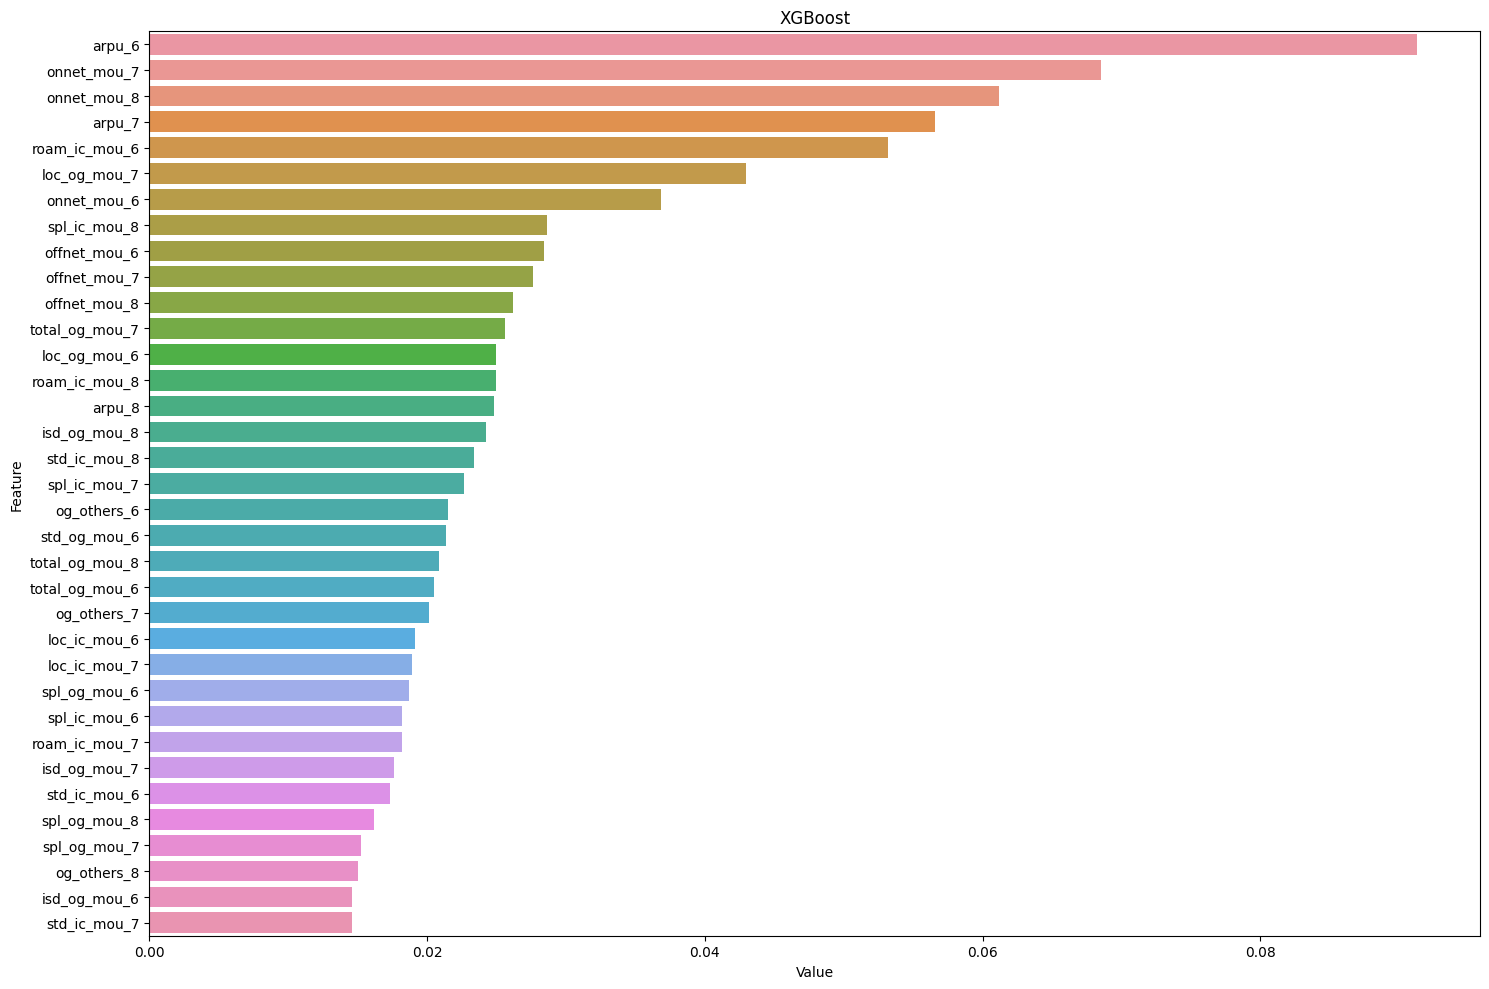

In [100]:
# Finding feature importance for XGBoost classifier 
feature_imp = pd.DataFrame(sorted(zip(xgbm_h.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(15, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('XGBoost')
plt.tight_layout()
plt.show()

In [101]:
# Finding Top 20 features of XGBoost: 
feature_imp=feature_imp.sort_values("Value",ascending = False)
feature_imp.head(20)

,Value,Feature
34,0.091243,arpu_6
33,0.068520,onnet_mou_7
32,0.061173,onnet_mou_8
31,0.056578,arpu_7
30,0.053205,roam_ic_mou_6
29,0.042947,loc_og_mou_7
28,0.036866,onnet_mou_6
27,0.028655,spl_ic_mou_8
26,0.028434,offnet_mou_6
25,0.027637,offnet_mou_7


In [102]:
pred_cols = feature_imp['Feature'].tolist()
print(pred_cols)


['arpu_6', 'onnet_mou_7', 'onnet_mou_8', 'arpu_7', 'roam_ic_mou_6', 'loc_og_mou_7', 'onnet_mou_6', 'spl_ic_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'total_og_mou_7', 'loc_og_mou_6', 'roam_ic_mou_8', 'arpu_8', 'isd_og_mou_8', 'std_ic_mou_8', 'spl_ic_mou_7', 'og_others_6', 'std_og_mou_6', 'total_og_mou_8', 'total_og_mou_6', 'og_others_7', 'loc_ic_mou_6', 'loc_ic_mou_7', 'spl_og_mou_6', 'spl_ic_mou_6', 'roam_ic_mou_7', 'isd_og_mou_7', 'std_ic_mou_6', 'spl_og_mou_8', 'spl_og_mou_7', 'og_others_8', 'isd_og_mou_6', 'std_ic_mou_7']


## Final Conculsion

#### XGBoost have better results and executed faster than Random Forest  

### Logistics Regression 
    ROC score: 0.85
    Accuracy Score: 0.85

### Random Forest

    ROC score: 0.95
    Accuracy score 0.95


### XG Boost

    ROC score: 0.95
    Accuracy Score 0.95

#### Recommedation to the Telecom companay

Based on the Top 20 features here are the recommendation


1.Telecom company needs to pay attention to the monthly 2g/3g data rates and roaming rates. 

2.The company needs to focus on the Operator T2F, T2M and T2C local and STD rates. Also, focus should be on addressing the special outgoing and ISD incoming call rates.

3.Also, the customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.

 



# Predicting on the test set provided

In [103]:
df_test_data = pd.read_csv("C:\\TelecomChurnAssignment\\test.csv")

In [104]:
df_test_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [105]:
df_test_data.shape

(30000, 171)

In [106]:
metadata_matrix(df_test_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,7585,22415,74.72,2676
count_rech_3g_6,float64,7585,22415,74.72,23
fb_user_6,float64,7585,22415,74.72,2
night_pck_user_6,float64,7585,22415,74.72,2
total_rech_data_6,float64,7585,22415,74.72,28
max_rech_data_6,float64,7585,22415,74.72,43
count_rech_2g_6,float64,7585,22415,74.72,26
date_of_last_rech_data_6,object,7585,22415,74.72,30
av_rech_amt_data_6,float64,7585,22415,74.72,562
arpu_2g_6,float64,7585,22415,74.72,2776


Imputing the null rows with 0 the same way as done in train set . Following the same steps of feature removal also

In [107]:
unique_val_col = []
for col in df_test_data.columns:
    if df_test_data[col].value_counts().shape[0] ==1:
        unique_val_col.append(col)
    
print(unique_val_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [108]:
df_test_data.drop(unique_val_col, axis=1 , inplace=True)

In [109]:
df_test_data.shape

(30000, 158)

In [110]:
df_test_data[cols_june].head()

,arpu_3g_6,night_pck_user_6,total_rech_data_6,max_rech_data_6,date_of_last_rech_data_6,count_rech_2g_6,av_rech_amt_data_6,fb_user_6,count_rech_3g_6,arpu_2g_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
df_test_data[cols_june] = df_test_data[cols_june].apply(lambda x: x.fillna(0))

In [112]:
df_test_data[cols_july] = df_test_data[cols_july].apply(lambda x: x.fillna(0))

In [113]:
df_test_data[cols_aug] = df_test_data[cols_aug].apply(lambda x: x.fillna(0))

In [114]:
metadata_matrix(df_test_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_t2m_mou_8,float64,28325,1675,5.58,12751
loc_og_t2t_mou_8,float64,28325,1675,5.58,7512
std_og_t2f_mou_8,float64,28325,1675,5.58,1257
isd_og_mou_8,float64,28325,1675,5.58,560
std_og_t2m_mou_8,float64,28325,1675,5.58,9063
spl_og_mou_8,float64,28325,1675,5.58,2761
std_og_t2t_mou_8,float64,28325,1675,5.58,7906
og_others_8,float64,28325,1675,5.58,83
loc_og_mou_8,float64,28325,1675,5.58,13999
loc_ic_t2t_mou_8,float64,28325,1675,5.58,7794


In [115]:
# We still see some 0 values in the columns where recharge was not done in 6,7,8 months ,instead of dropping these these impute them with 0
#so we are imputing those values as 0 instead of iteratively imputing.
df_test_data = df_test_data.fillna(0)

In [116]:
metadata_matrix(df_test_data)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,30000,0,0.0,30000
date_of_last_rech_data_8,object,30000,0,0.0,32
date_of_last_rech_7,object,30000,0,0.0,32
date_of_last_rech_8,object,30000,0,0.0,32
last_day_rch_amt_6,int64,30000,0,0.0,149
last_day_rch_amt_7,int64,30000,0,0.0,149
last_day_rch_amt_8,int64,30000,0,0.0,167
date_of_last_rech_data_6,object,30000,0,0.0,31
date_of_last_rech_data_7,object,30000,0,0.0,32
total_rech_data_6,float64,30000,0,0.0,29


In [117]:
# Let's drop individual columns whose totals are available as a different attribute

individual_cols = ['loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
                   'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
                   'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
                   'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8',
                   'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8',
                   'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
                   'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                   'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                   'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
                   'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
                   'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8',
                   'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8',
                   'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
                   'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
                   'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
                   'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
                   'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']



df_test_data.drop(individual_cols, axis = 1, inplace = True)

In [118]:
df_test_data.shape

(30000, 107)

In [119]:
df_test_data.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                          'jul_vbc_3g':'vbc_3g_7',
                          'aug_vbc_3g':'vbc_3g_8',
                          'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

In [120]:
columns_to_convert = ['fb_user_6', 'fb_user_7', 'fb_user_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8']

# Convert the specified columns from float to categorical
for col in columns_to_convert:
    df_test_data[col] = df_test_data[col].astype(int)

In [121]:
# Fitting the colums for final evalutaion 

In [122]:
df_test_data.dropna(inplace = True)

In [123]:
df_test_data.shape

(30000, 107)

In [124]:
df_test_churn = df_test_data.copy()

In [125]:
df_test_churn.drop('id', axis =1 , inplace= True)

In [182]:
df_test_churn.shape

(30000, 106)

In [190]:
df_test = df_test_churn[pred_cols].copy()

In [191]:
df_test.shape

(30000, 35)

In [192]:
df_test.head()

,arpu_6,onnet_mou_7,roam_ic_mou_6,onnet_mou_8,arpu_7,onnet_mou_6,std_og_mou_6,spl_ic_mou_8,loc_og_mou_7,offnet_mou_6,offnet_mou_7,offnet_mou_8,total_og_mou_7,std_ic_mou_8,roam_ic_mou_8,arpu_8,total_og_mou_8,og_others_7,spl_ic_mou_7,isd_og_mou_8,total_og_mou_6,loc_og_mou_6,loc_ic_mou_7,loc_ic_mou_6,spl_og_mou_6,std_ic_mou_6,spl_og_mou_8,isd_og_mou_7,og_others_6,roam_ic_mou_7,og_others_8,isd_og_mou_6,spl_ic_mou_6,spl_og_mou_7,std_ic_mou_7
0,91.882,20.23,0.00,23.11,65.330,31.78,48.93,0.39,44.71,60.16,32.16,34.83,52.39,4.34,0.00,64.445,57.94,0.0,0.34,0.0,91.94,43.01,42.16,40.81,0.00,0.36,0.03,0.0,0.0,0.00,0.0,0.0,0.54,0.00,1.04
1,414.168,41.21,0.00,19.84,515.568,75.51,0.00,0.00,639.29,474.34,621.84,394.94,663.06,0.00,0.00,360.868,415.59,0.0,0.00,0.8,549.86,549.86,149.24,181.69,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,12.51
2,329.844,7.86,22.81,8.40,434.884,7.54,0.00,0.00,0.00,16.98,45.81,45.04,0.00,0.00,26.08,746.239,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,103.38,0.0,0.0,0.00,0.00,0.00
3,43.550,2.16,0.00,0.00,171.390,5.31,37.09,0.00,98.61,40.04,205.01,24.01,207.18,8.83,0.00,24.400,24.01,0.0,0.00,0.0,45.36,8.26,504.86,546.06,0.00,9.63,1.15,0.0,0.0,0.00,0.0,0.0,0.00,12.03,16.14
4,306.854,609.03,0.00,700.68,406.289,450.93,509.03,0.00,3.44,60.94,23.84,74.16,638.28,141.48,0.00,413.329,779.78,0.0,0.00,0.0,514.79,2.84,9.59,10.13,0.71,43.59,4.96,0.0,2.2,0.00,0.0,0.0,0.00,5.39,106.33


In [196]:
# using Random forest to predict 
y_pred = rfcm_h.predict(df_test)

In [132]:
xgbm_h.feature_names_in_

array(['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8',
       'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16',
       'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24',
       'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32',
       'PC33', 'PC34'], dtype='<U4')

In [141]:
# Using XGBoost to Predit
df_test.columns = X_train_pca.columns

predictions = xgbm_h.predict(df_test)




Saving the Random Forest predictions

In [142]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv("C:\\TelecomChurnAssignment\\sample.csv")
datasets=pd.concat([sub_df['id'],pred],axis=1)
datasets.columns=['Id','churn_probability']
datasets.to_csv('C:\\TelecomChurnAssignment\\sample_submission.csv',index=False)

Saving the XGboost Predictions

In [146]:
pred_xg=pd.DataFrame(predictions)
sub_df=pd.read_csv("C:\\TelecomChurnAssignment\\sample.csv")
datasets=pd.concat([sub_df['id'],pred_xg],axis=1)
datasets.columns=['Id','churn_probability']
datasets.to_csv('C:\\TelecomChurnAssignment\\sample_submission_xg.csv',index=False)

The accuracy improved from 86% to 90% after using XGboost 